# Client- vs Server-Side Web Analytics Comparison

In [1]:
import os
import json
import pandas as pd
import plotly
import plotly.express as px

In [2]:
DATA_FILE = "data.csv"
GRAPH_FILE = "analytics_graph.json"

In [3]:
df = pd.read_csv(DATA_FILE)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             23 non-null     datetime64[ns]
 1   Cloudflare       23 non-null     int64         
 2   GoogleAnalytics  23 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 680.0 bytes


In [4]:
df.head()

,Date,Cloudflare,GoogleAnalytics
0,2021-07-08,477,135
1,2021-07-09,431,130
2,2021-07-10,307,61
3,2021-07-11,281,66
4,2021-07-12,465,134


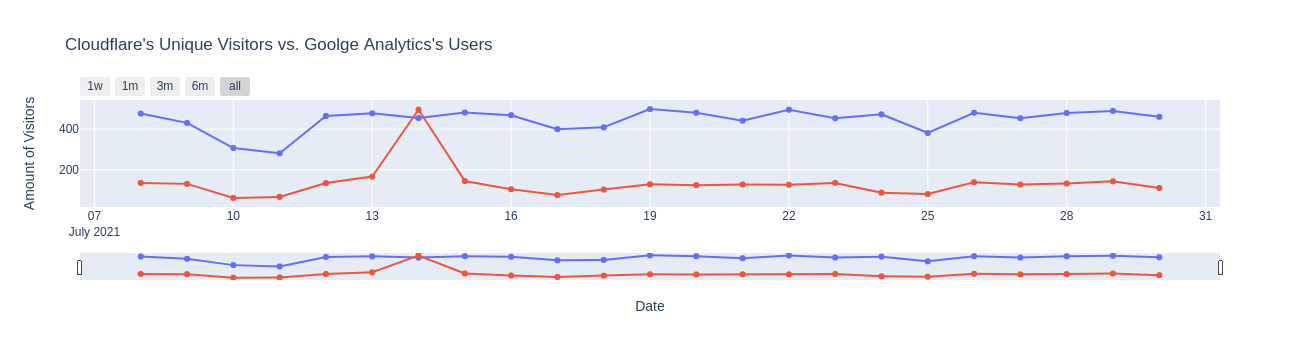

In [17]:
fig = px.line(df, x="Date", y=['Cloudflare', 'GoogleAnalytics'],
              hover_data={"Date": "|%B %d, %Y"},
              title="Cloudflare's Unique Visitors vs. Goolge Analytics's Users")

fig.update_layout(
    yaxis_title="Amount of Visitors",
    hovermode="x unified",
    showlegend=False,
    legend_title_text='Source',
)

fig.update_traces(mode="markers+lines", hovertemplate=None)


fig.update_xaxes(
    #dtick=86400000.0,
    tickformat="%d\n%B\n%Y",
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)


fig.show()

plotly.io.write_json(fig, GRAPH_FILE)

In [6]:
print('Amount of Visits Scale: {}'.format(df['Cloudflare'].sum() / df['GoogleAnalytics'].sum()))

Amount of Visits Scale: 3.337459283387622


In [7]:
df['scale'] = df['Cloudflare'] / df['GoogleAnalytics']

In [8]:
df.head(13)

,Date,Cloudflare,GoogleAnalytics,scale
0,2021-07-08,477,135,3.533333
1,2021-07-09,431,130,3.315385
2,2021-07-10,307,61,5.032787
3,2021-07-11,281,66,4.257576
4,2021-07-12,465,134,3.470149
5,2021-07-13,478,166,2.879518
6,2021-07-14,455,496,0.917339
7,2021-07-15,482,144,3.347222
8,2021-07-16,469,104,4.509615
9,2021-07-17,400,75,5.333333


In [9]:
print('Average Scale Factor: {}'.format(df['scale'].mean()))

Average Scale Factor: 3.8120328376594395


In [10]:
print('Pearson correlation:\n {}'.format(df[['Cloudflare', 'GoogleAnalytics']].corr()))

Pearson correlation:
                  Cloudflare  GoogleAnalytics
Cloudflare         1.000000         0.293297
GoogleAnalytics    0.293297         1.000000


# Weekly Stat

In [11]:
ws = df.copy()
ws.drop(columns="scale", inplace=True)
ws.set_index("Date", inplace=True)
ws = ws.resample("W", label='right').sum()

In [13]:
ws.head()

,Cloudflare,GoogleAnalytics
Date,,
2021-07-11,1496,392
2021-07-18,3158,1221
2021-07-25,3226,807
2021-08-01,2366,650


In [15]:
ws.shift(periods=-1)

,Cloudflare,GoogleAnalytics
Date,,
2021-07-11,3158.0,1221.0
2021-07-18,3226.0,807.0
2021-07-25,2366.0,650.0
2021-08-01,NaN,NaN
